===================================================     
    This code is created by :
    
    Dr. Vikram Singh Dharodi,
    Institute for Plasma research,India,
    Email: dharodiv@msu.edu,
    Web: https://sites.google.com/site/vsdharodi
===================================================    

## Newtonian dynamics of a particle in double-well potential with dissipative force:

### Step 1. Define the potential well

### Step 2. Define the initial conditions

### Step 3. Move the particle in well by using the Newton's equation of motion   ${m}{\dot{{v}}}={f(r)}
-{\hspace{-1.0cm}}{\overbrace{
{\hspace{-0.85cm}}{\underbrace{{\zeta}}_\text
{Friction coefficient}}{\hspace{-0.85cm}}{m}{\dot{r}}}^\text
{Dissipative frictional force}}$

In [1]:
# importing the required modules 
import time
import matplotlib.pyplot as plt 
import numpy as np 
import math 
print ('Updated on', time.strftime("%d/%m/%Y"))

Updated on 25/07/2021


In [2]:
# setting the x-coordinates 
rmin=-10
rmax=10
ngr=1200
rdis = np.linspace(rmin,rmax,ngr)
#print(xx)

In [3]:
# Parameters of double-well potential:
cntr=0;
a4 =1/(2.50e+12)
a2 =1/(3.50e+10) 
sigma=2.0e-10
coff=math.sqrt(a4/(2*a2))
coffw=sigma*coff
UEnergy =a4*(rdis-cntr)**4-a2*(rdis-cntr)**2+coffw*(rdis-cntr)

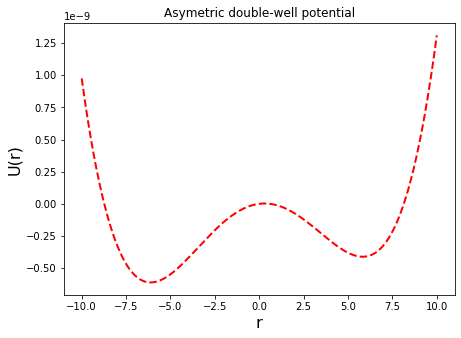

In [4]:
fig_well = plt.figure(figsize=(7,5))
plt.plot(rdis,UEnergy, linestyle='--', color='r',linewidth=2)
plt.title('Asymetric double-well potential', fontsize=12)
# plt.yticks(np.arange(-1e-9, 1.5e-9, 0.5e-9), fontsize=12)
# plt.xticks(np.arange(-12, 12, 2.5), fontsize=12) 
plt.xlabel('r', fontsize=16)  
plt.ylabel('U(r)', fontsize=16)  
plt.draw()
# fig.savefig('fig_well.png', dpi=300)

In [5]:
Ubmp = UEnergy[(rdis>=-1) & (rdis<=1)]
Ubump=max(Ubmp)
UminR=min(UEnergy[(rdis>=4) & (rdis<=10)])
rint = rdis[np.where(UEnergy == UminR)]
IntPE =a4*(rint-cntr)**4-a2*(rint-cntr)**2+coffw*(rint-cntr)
# #https://stackoverflow.com/questions/13869173/numpy-find-index-of-the-elements-within-range

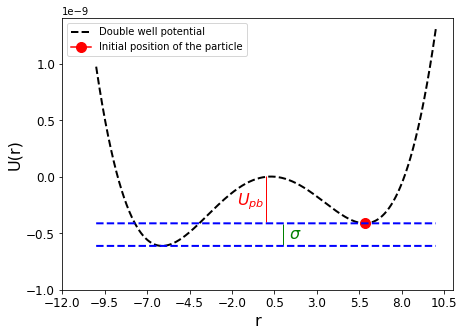

In [6]:
fig_well_prtcl = plt.figure(figsize=(7,5))
plt.plot(rdis,UEnergy, linestyle='--', color='k',linewidth=2)
plt.plot(rint,IntPE, marker=".",markersize=20, color='r')
plt.legend(["Double well potential", "Initial position of the particle"])
plt.plot(rdis,IntPE*np.ones(rdis.size), linestyle='--', color='b',linewidth=2)
plt.plot(rdis,min(UEnergy)*np.ones(rdis.size), linestyle='--', color='b',linewidth=2)
plt.text(rint-4.5,0.54*(min(UEnergy)+IntPE),'$\sigma$', fontsize=16, color='g')
plt.arrow(1.0, -0.6e-9, 0, 1e-12, width=0.4e-10, color='g')
plt.text(0.0-1.7,-0.25e-9,'$U_{pb}$', fontsize=16, color='r')
plt.arrow(0.0,-0.4e-9, 0, 1e-12, width=0.9e-10, color='r')
# plt.arrow(x=4, y=18, dx=2, dy=5, width=.06) 
# plt.title('Initial position of a particle', fontsize=12)
plt.yticks(np.arange(-1e-9, 1.5e-9, .5e-9), fontsize=12)
plt.xticks(np.arange(-12, 12, 2.5), fontsize=12) 
plt.xlabel('r', fontsize=16)  
plt.ylabel('U(r)', fontsize=16)  
plt.show()

𝛔 : Shift between bottoms of the wells (asymmetric parameter).

𝑈𝑝𝑏 : Potential barrier. 

### Step 2. Intial conditions: Initial position & velocity of particle in well

The initial position of particle is $x(t=0)$= minimum of the right well. It is clear from above figure $U_{pb}=E_{bump}-E_{minR}$. Thus, to cross the potential barrier $U_{pb}$ this particle should have the ratio of kinetic energy with $U_{pb}$ greater than unity i.e
 
 $1<V_0=\frac{{\frac{1}{2}}{m}{v^2}}{U_{pb}}$; m is the mass of the particle.

$v(t=0)=V_{coeff}{\sqrt{\frac{2U_{pb}}{m}}}$.

In the present case, we consider $V_{coeff}=1.5$ which implies that the particle will jump in the left well as well.

In [7]:
# Set initial velocity 
Vcoeff=1.5
mass=1.455000e-22
ecrg=4.803000e-10
alpha=25e-24
den=1.0000e+13
Eshift=Ubump-UminR
vint=Vcoeff*math.sqrt(2*Eshift/mass) 
zeta=2*math.pi*ecrg*math.sqrt(alpha/mass)*den;

### Step 3. Hamiltonian of the classical particle in a potential U(r) is the following

 $H=\frac{p^2}{2m}+U(r)$, where  $f(r)=-{\nabla_r}U(r)$


### Newton's equation of motion with dissipative force, $m{\ddot{r}}=f(r)-{\zeta}{m}{v}$
  
  
 ${\dot{r}}=v$ ==> $r=r_0+v{dt}$
 
 ${\dot{v}}={\frac{f(r)}{m}}-{\zeta}{{v}}$ ==> $v=v_0+{\frac{f(r)}{m}}{dt}-{\zeta}{v}{dt}$
  
  dt is the time step to advance the particle. $\zeta={\gamma_{in}}={2{\pi}{e}}{\sqrt{\frac{{\alpha_p}{(m_i+m_n)}}{{m_i}{m_n}}}}{n_n}$. $n_n$ is the neutral background density $\alpha_p$ is the polarizability of given Sr atom

In [8]:
# Define force to update it with time

def my_double_well_force(x,cntr,a,b,coff2):
    force =-4*a*(x-cntr)**3+2*b*(x-cntr)-coff2 
    return force
#print(force)

In [9]:
#         ylm = ax3.get_ylim()
#         ax3.set_ylim(ylm)

In [10]:
# Compute the PDF on the bin centers from scipy distribution object
from celluloid import Camera
%matplotlib inline
# %matplotlib notebook
from IPython.display import HTML

nsteps=7201
pltstep=200
dt = 8.0e-8 

# np.seterr(divide='ignore', invalid='ignore')

pos=[None]*nsteps
vel=[None]*nsteps
tstep=[None]*nsteps
PEng=[None]*nsteps
KEng=[None]*nsteps
TEng=[None]*nsteps

pos = np.array(pos, dtype="object")
vel = np.array(vel, dtype="object")
tstep=np.array(tstep, dtype="object")
PEng=np.array(PEng, dtype="object")
KEng=np.array(KEng, dtype="object")
TEng=np.array(TEng, dtype="object")

fig = plt.figure(dpi = 100)
fig.set_figheight(8)
fig.set_figwidth(8)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

fig.suptitle('Newtonian dynamics with damping force', fontsize=20)
plt.ion()
plt.close()
camera = Camera(fig)
cntf=0

pdf = 0
##########################################################
#################### Newtonian dynamics ##################
#################### The velocity Verlet algorithm #######
##########################################################
for step in range(0,nsteps):
    cntf=cntf+1
    cnt=cntf-1
    old_pos=rint
    old_force=my_double_well_force(rint,cntr,a4,a2,coffw)
    
    # v(t) 
    vdtby2= vint + (dt/2)*(old_force/mass)-(dt/2)*zeta*vint
    
    # x(t+dt) Update postion
    rdt = rint+vdtby2*dt
    
    new_force=my_double_well_force(rdt,cntr,a4,a2,coffw)
    
    # v(t+dt) Update velocity
    vdt = vdtby2 + (dt/2)*(new_force/mass)-(dt/2)*zeta*vint
    
    vint=vdt
    rint=rdt
 ##########################################################
##########################################################

    npos=rdt
    nvel=vdt
    samples = npos
    
    bins = np.linspace(rmin, rmax, 50)
    histogram, bins = np.histogram(samples, bins=bins, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    pdf = pdf + histogram
    pdfun= pdf/np.sum(pdf)
    num=max(pdfun)
#     print(num)

    UPE =a4*(npos-cntr)**4-a2*(npos-cntr)**2+coffw*(npos-cntr)
    KE=0.5*mass*(nvel**2)
    TE=UPE+KE  
    
    pos[step]=npos
    vel[step]=nvel   
    tstep[step]=step
    PEng[step]=UPE
    KEng[step]=KE
    TEng[step]=TE  
    time=cnt*dt
#     step=step-1
#   
    if step % pltstep == 0:
#         ax3.cla()
        print(step)
        ax1.plot(rdis,UEnergy, linestyle='--', color='k',linewidth=2)
        ax1.plot(rint,UPE, marker=".",color='r', markersize=10) 
        ax1.set_xlim([-12, 12])
        ax1.set_ylim([-1e-9, 1.5e-9])
        ax1.set_title('Particle in well')
        ax1.legend(['Step=%i' %cnt])
        ax1.set_xlabel('r', fontsize=12)  
        ax1.set_ylabel('U(r)', fontsize=12) 
        
        ax2.plot(pos,vel, linestyle='-', color='k',linewidth=2)
        ax2.plot(rint,vint, marker=".",color='r', markersize=10)
        ax2.set_xlim([-12, 12])
        ax2.set_title('Phase Space')
        ax2.legend(['t=%.2e' %time])
        ax2.set_xlabel('r', fontsize=16)  
        ax2.set_ylabel('Vel(r)', fontsize=16) 
        
        ax3.plot(bin_centers,pdfun, marker=".",color='r', markersize=5) 
        ax3.set_title('Probality density distribution')
        ax3.legend(['Step=%i' %cnt])
        ax3.set_xlabel('r', fontsize=16)  
        ax3.set_ylabel('Pdf (r)', fontsize=16)
        ax3.set_ylim([0, 0.3])
#         ax3.autoscale(enable=True, axis='y', tight=False)
        
        ax4.plot(tstep,PEng,'g',tstep,KEng,'b',tstep,TEng,'r')
        ax4.legend(['Pot Eng=%i' %cnt, 'Kin Eng', 'Total Eng'])
        ax4.set_xlim([0,nsteps])
        ax4.set_title('Energy Conservation')
        ax4.set_xlabel('Step', fontsize=16)  
        ax4.set_ylabel('Energy', fontsize=16)  
        ax4.set_xticks(np.arange(0, nsteps, (nsteps-1)/2), minor=False)
        plt.draw()
        fig.canvas.draw() 
        camera.snap() 
#         plt.pause(.2) 
        fig.tight_layout(pad=2.0)
# animation = camera.animate(blit=True, interval=10)        
animation = camera.animate()
# HTML(animation.to_html5_video())
animation.save('z_animation_Nwtn1p5_damping.mp4')
HTML(animation.to_jshtml())
# animation.save('animation1.gif', writer='pillow', fps=2)

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200


<Figure size 432x288 with 0 Axes>